#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Bayes Theorem form P(y|X) = P(X|y) * P(y) / P(X) <br>
prior probability P(y) <br>

We will assume that probability of specific target value given specific class is normally distributed probability density function derived from wikipedia:<br>
     (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)

In [2]:
class NaiveBayesClassifier():
    
    def calc_prior(self, features, target):
        #calculate prior probabilities
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior
    
    def calc_statistics(self, features, target):
        #calculate mean, variance for each column and convert to numpy array 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        #calculate probability from gaussian density function (normally distributed)
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='mako', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='mako', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('Comparison of True values and Predicted values', fontsize=22)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()


#### Pre-process dataset for training

In [3]:
# upload Iris dataset
df = pd.read_csv("./iris.csv")

# shuffle dataset with sample
df = df.sample(frac=1, random_state=1).reset_index(drop=True)

# df shape
print(df.shape)

# set features and target
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# split on train and test 0.8/0.2
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(150, 5)
(100, 4) (100,)
(50, 4) (50,)


In [4]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.8,4.0,1.2,0.2,Setosa
1,5.1,2.5,3.0,1.1,Versicolor
2,6.6,3.0,4.4,1.4,Versicolor
3,5.4,3.9,1.3,0.4,Setosa
4,7.9,3.8,6.4,2.0,Virginica
...,...,...,...,...,...
145,6.3,2.8,5.1,1.5,Virginica
146,6.4,3.1,5.5,1.8,Virginica
147,6.3,2.5,4.9,1.5,Versicolor
148,6.7,3.1,5.6,2.4,Virginica


In [5]:
X_train.shape

(100, 4)

In [6]:
X_train

,sepal.length,sepal.width,petal.length,petal.width
0,5.8,4.0,1.2,0.2
1,5.1,2.5,3.0,1.1
2,6.6,3.0,4.4,1.4
3,5.4,3.9,1.3,0.4
4,7.9,3.8,6.4,2.0
...,...,...,...,...
95,6.7,3.0,5.2,2.3
96,6.3,2.3,4.4,1.3
97,6.2,3.4,5.4,2.3
98,7.2,3.6,6.1,2.5


#### Training the model

In [7]:
# train the model
x = NaiveBayesClassifier()

x.fit(X_train, y_train)

In [8]:
predictions = x.predict(X_test)

In [9]:
x.accuracy(y_test, predictions)

0.92

In [10]:
y_test.value_counts(normalize=True)

Setosa        0.38
Versicolor    0.36
Virginica     0.26
Name: variety, dtype: float64

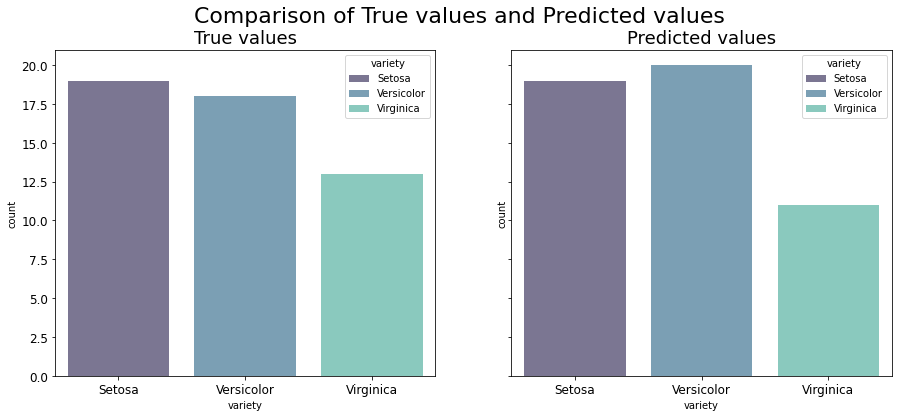

In [11]:
x.visualize(y_test, predictions, 'variety')